**Kenya Poverty Levels and Predictions**

**Introduction**

Kenya is a country in Africa well known for its wildlife attraction,
athletics and silicon savannah. Though the country also faces the 
challenge of poverty. The objective of this project is to predict
the poverty levels of individuals in Kenya using the data provided
by Kaggle.

**Sample of the data**

In [2]:
import pandas as pd

poverty_level = pd.read_csv('overall_poverty_est.csv')

poverty_level.head(10)

,residence_county,Headcount Rate (%),Distribution of the Poor (%),Poverty Gap (%),Severity of Poverty (%),Population (ths),Number of Poor (ths)
0,National,36.1,100.0,10.4,4.5,"45,371","16,401"
1,Rural,40.1,71.3,11.5,5.0,"29,127","11,687"
2,Peri-Urban,27.5,5.6,6.9,2.6,"3,340",920
3,Core-Urban,29.4,23.1,8.9,3.9,"12,905","3,795"
4,Mombasa,27.1,2.0,7.5,3.3,"1,185",321
5,Kwale,47.4,2.4,11.1,3.6,820,389
6,Kilifi,46.4,4.0,12.3,4.8,"1,400",650
7,Tana River,62.2,1.2,20.0,9.3,304,189
8,Lamu,28.5,0.2,5.5,1.8,128,36
9,Taita/Taveta,32.3,0.7,7.7,2.7,358,116


Checking the data types of the columns

In [3]:
poverty_level.dtypes

residence_county                 object
Headcount Rate (%)              float64
Distribution of the Poor (%)    float64
Poverty Gap (%)                 float64
Severity of Poverty (%)         float64
Population (ths)                 object
Number of Poor (ths)             object
dtype: object

**Data Cleaning**

The data provided by Kaggle is not clean. The data may have missing 
values. Let's check it out.

In [4]:
poverty_level.isnull().sum()

residence_county                0
Headcount Rate (%)              0
Distribution of the Poor (%)    0
Poverty Gap (%)                 0
Severity of Poverty (%)         0
Population (ths)                0
Number of Poor (ths)            0
dtype: int64

The data has no missing values. Let's check for duplicates.

In [5]:
poverty_level.duplicated().sum()

0

The data has no duplicates.

**Exploratory Data Analysis**

Let's check the distribution of the data. 

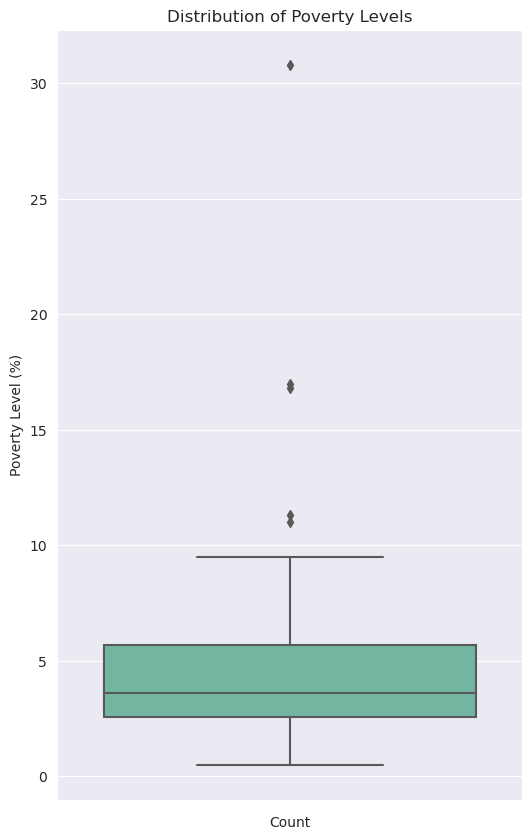

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('Set2')

plt.figure(figsize=(6, 10))
sns.boxplot(y='Severity of Poverty (%)', data=poverty_level)
plt.xticks(rotation=45)
plt.title('Distribution of Poverty Levels')
plt.ylabel('Poverty Level (%)')
plt.xlabel('Count')
plt.show()

The percentage of poverty reaches about 30% of the total population.
But the most vulnerable make up a 10%.

**Data Cleaning**

We will convert two columns to float data type. Also, the values in 
it will be converted to thousands.The columns are 'Population (ths)'
and 'Number of Poor (ths)'.

In [7]:
poverty_level['Population (ths)'] = poverty_level['Population (ths)'].str.replace(',', '').astype(float)

poverty_level['Number of Poor (ths)'] = poverty_level['Number of Poor (ths)'].str.replace(',', '').astype(float)

poverty_level.dtypes

residence_county                 object
Headcount Rate (%)              float64
Distribution of the Poor (%)    float64
Poverty Gap (%)                 float64
Severity of Poverty (%)         float64
Population (ths)                float64
Number of Poor (ths)            float64
dtype: object

**Population comparison in each county**

Let's check the population in each county.

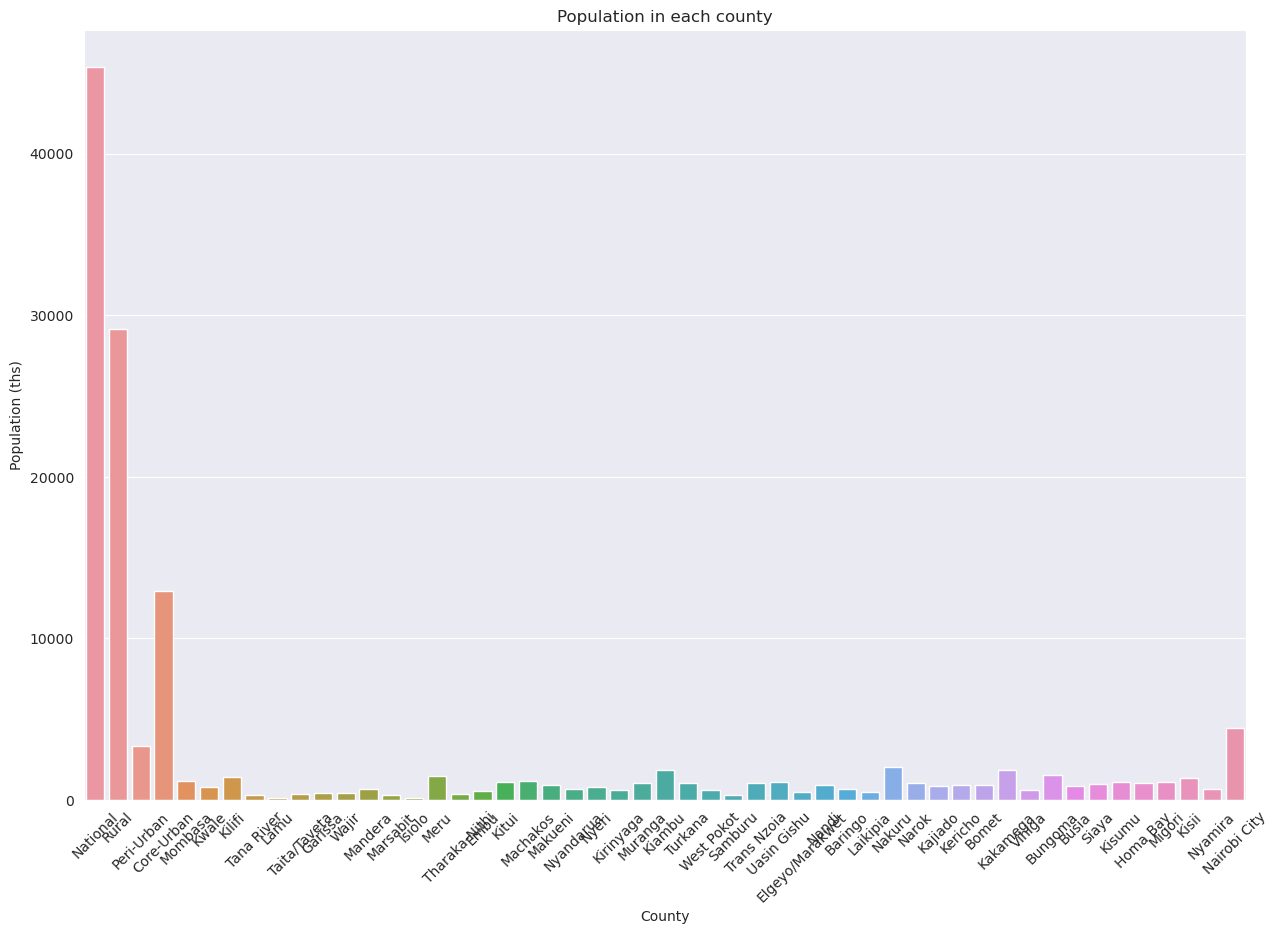

In [8]:
plt.figure(figsize=(15, 10))
sns.barplot(x='residence_county', y='Population (ths)', data=poverty_level)
plt.xticks(rotation=45)
plt.title('Population in each county')
plt.ylabel('Population (ths)')
plt.xlabel('County')
plt.show()

Nairobi has the highest population followed by Kiambu and Nakuru. 

**Poverty levels in each county**

We will check the poverty levels in each county.

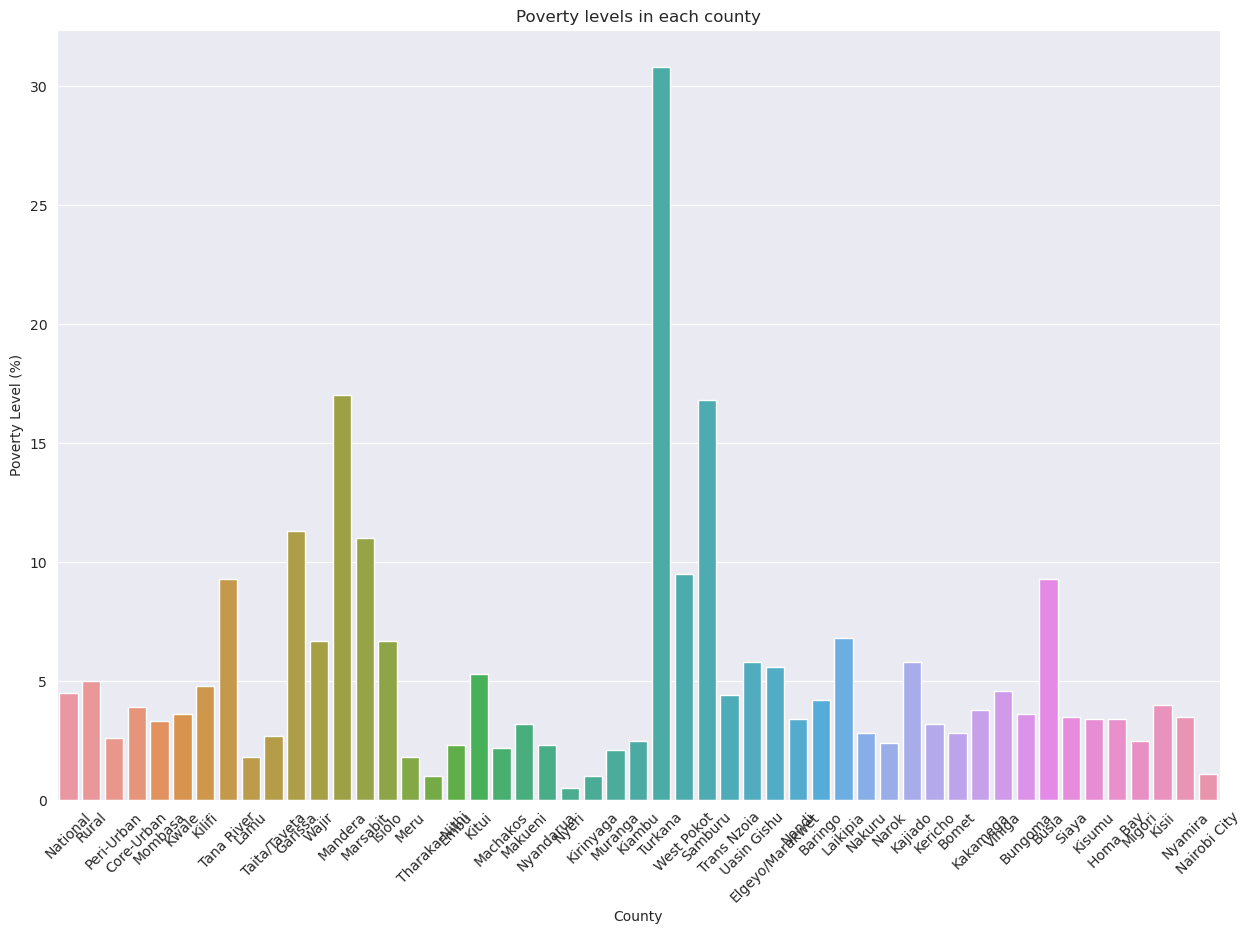

In [9]:
plt.figure(figsize=(15, 10))

sns.barplot(x='residence_county', y='Severity of Poverty (%)', data=poverty_level)
plt.xticks(rotation=45)
plt.title('Poverty levels in each county')
plt.ylabel('Poverty Level (%)')
plt.xlabel('County')
plt.show()

Kiambu has the highest poverty severity followed by Wajir and West Pokot.